<a href="https://colab.research.google.com/github/mananuppadhyay/IPARC-Decision-trees/blob/main/Method_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ac20/IPARC_ChallengeV2

Cloning into 'IPARC_ChallengeV2'...
remote: Enumerating objects: 2393, done.
remote: Counting objects: 100% (2393/2393), done.
remote: Compressing objects: 100% (1039/1039), done.
remote: Total 2393 (delta 1491), reused 2248 (delta 1352), pack-reused 0
Receiving objects: 100% (2393/2393), 1.76 MiB | 5.46 MiB/s, done.
Resolving deltas: 100% (1491/1491), done.


In [ ]:
%cd /content/IPARC_ChallengeV2

/content/IPARC_ChallengeV2


In [ ]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from xgboost import XGBClassifier
import pdb

Print one input output pair



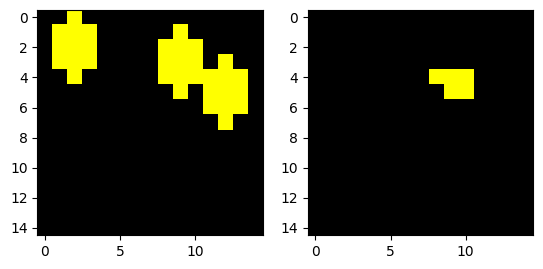

In [ ]:

from skimage.color import label2rgb

# Load data from the JSON file
with open('./Dataset/CatA_Simple/Task001.json', 'r') as f:
    data = json.load(f)

# Extract input and output arrays from the first example
input_array = np.array(data[0]['input'])
output_array = np.array(data[0]['output'])

# Create a palette to map the label values to colors
palette = np.array([[255, 255, 0], [255, 255, 255], [0, 0, 0]], dtype=np.uint8)

# Convert label values to RGB colors using the palette
input_rgb = label2rgb(input_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)
output_rgb = label2rgb(output_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)

# Show the images
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)
axs[0].imshow(input_rgb)
axs[1].imshow(output_rgb)
plt.show()


Printing Out All Input Output Pairs

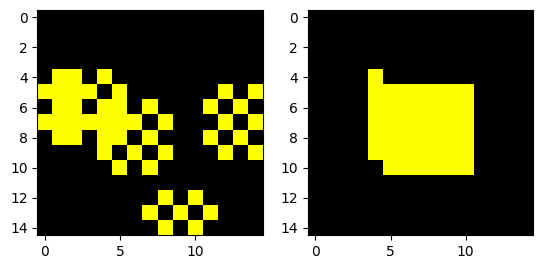

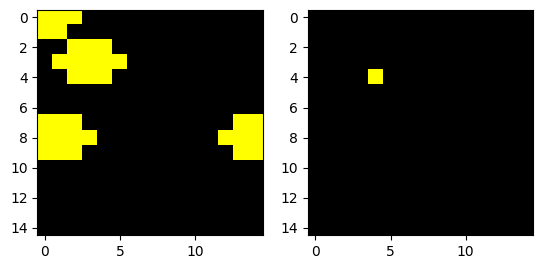

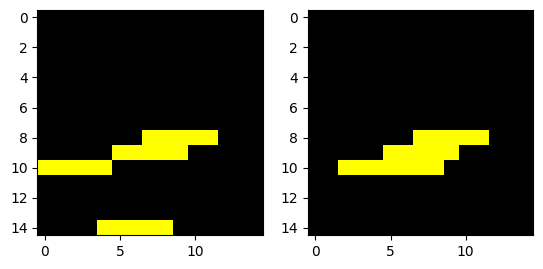

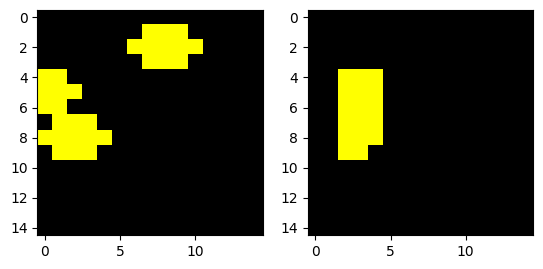

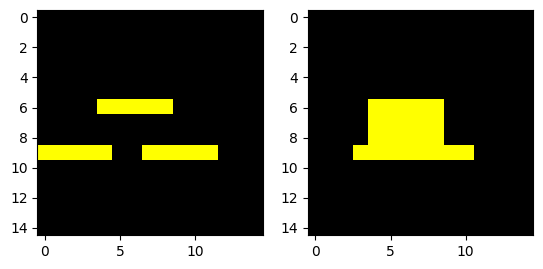

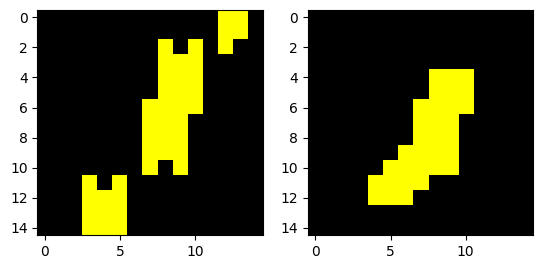

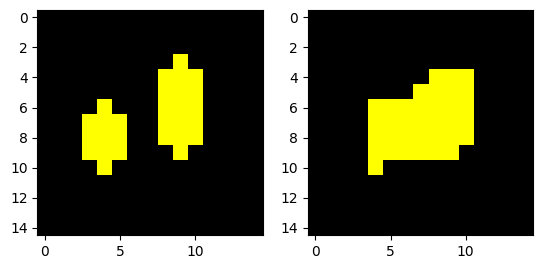

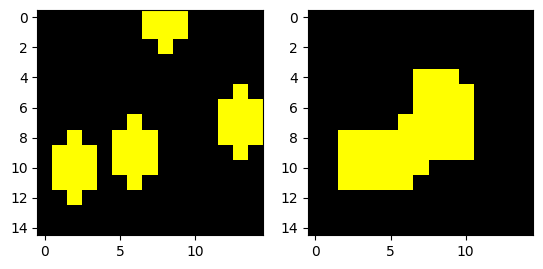

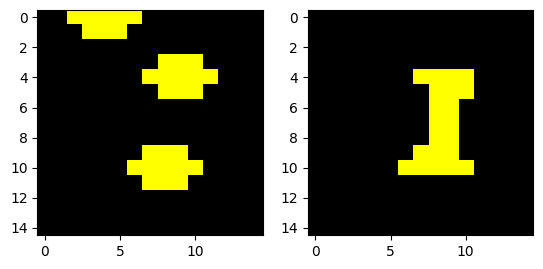

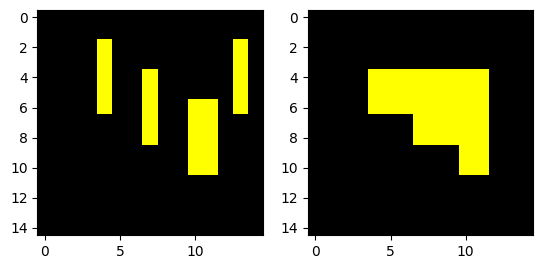

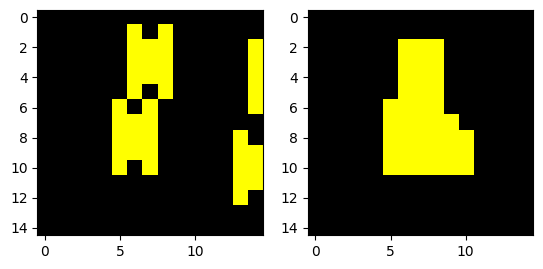

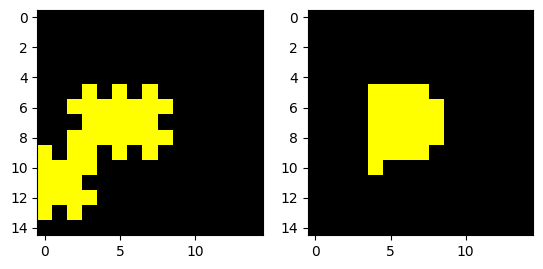

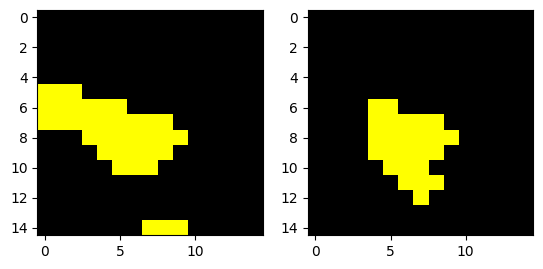

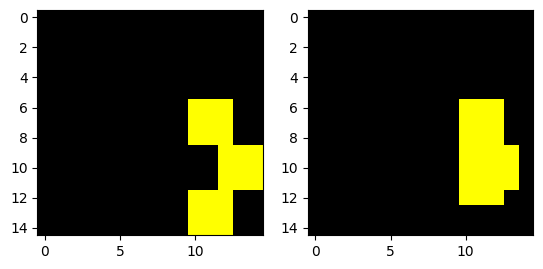

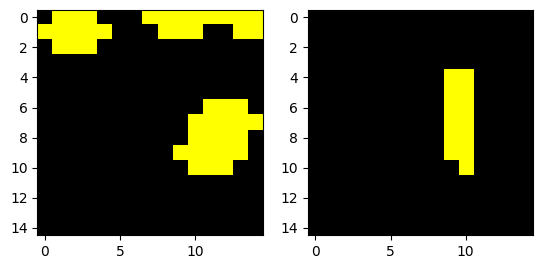

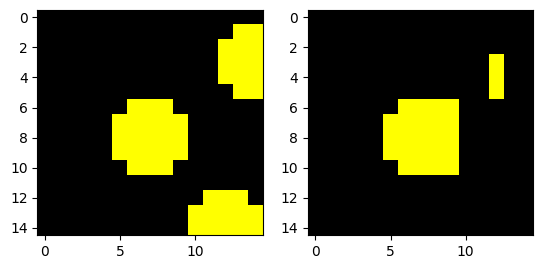

KeyboardInterrupt: ignored

In [ ]:
import json
import numpy as np
from skimage.color import label2rgb
import os

def visualize_json_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except ValueError:
                    print(f"Error: {file_path} is not a valid JSON file.")
                    continue

            # Extract input and output arrays from the first example
            input_array = np.array(data[0]['input'])
            output_array = np.array(data[0]['output'])

            # Create a palette to map the label values to colors
            palette = np.array([[255, 255, 0], [255, 255, 255], [0, 0, 0]], dtype=np.uint8)

            # Convert label values to RGB colors using the palette
            input_rgb = label2rgb(input_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)
            output_rgb = label2rgb(output_array, bg_label=0, bg_color=[0, 0, 0], colors=palette)

            # Show the images
            import matplotlib.pyplot as plt
            fig, axs = plt.subplots(1, 2)
            axs[0].imshow(input_rgb, vmin=0, vmax=255)
            axs[1].imshow(output_rgb, vmin=0, vmax=255)
            plt.show()
visualize_json_files("/content/IPARC_ChallengeV2/Dataset/CatA_Simple")


Instead of directly using input and output pixels, we shall use the neighbouring pixels for both input and output image to see the effect neighbours might have on this

In [ ]:
def VN_neighbours(color, cur_row, cur_col, nrows, ncols):

    if cur_row<=0: top = -1
    else: top = color[cur_row-1][cur_col]

    if cur_row>=nrows-1: bottom = -1
    else: bottom = color[cur_row+1][cur_col]

    if cur_col<=0: left = -1
    else: left = color[cur_row][cur_col-1]

    if cur_col>=ncols-1: right = -1
    else: right = color[cur_row][cur_col+1]

    return top, bottom, left, right



Defining the features:

In [ ]:
def make_features(input_color, nfeat,output_color):
    nrows, ncols = input_color.shape
    #print(nrows,ncols)
    feat = np.zeros((nrows*ncols,nfeat))
    cur_idx = 0
    for i in range(nrows):
        for j in range(ncols):
            feat[cur_idx,0] = i
            feat[cur_idx,1] = j
            feat[cur_idx,2] = input_color[i][j]
            feat[cur_idx,3:7] = VN_neighbours(input_color, i, j, nrows, ncols)
            feat[cur_idx,7]= output_color[i][j]
            feat[cur_idx,8:12] = VN_neighbours(output_color,i,j,nrows,ncols)
            cur_idx+=1
    return feat

In [ ]:
import os
import json
import pandas as pd

# Define the directory where the JSON files are located
json_dir = "/content/IPARC_ChallengeV2/Dataset/CatA_Simple"

# Get a list of all the JSON files in the directory and sort them by name
json_files = sorted([f for f in os.listdir(json_dir) if f.endswith(".json")])
feat, target = [], []
for filename in json_files:
    # Load the JSON file
    with open(os.path.join(json_dir, filename)) as f:
        data = json.load(f)
    #print("Hey")
    # Convert the input and output pixel values to NumPy arrays
    input_pixels = np.array(data[0]['input'])
    output_pixels = np.array(data[0]['output'])
    feat.extend(make_features(input_pixels, 12,output_pixels))
    #target.extend()



In [ ]:
len(feat)

22500

In [ ]:
from itertools import chain

flatten_list = list(chain.from_iterable(feat))

In [ ]:
arr= np.array(flatten_list).reshape(100,2700)

In [ ]:
df = pd.DataFrame(arr,dtype = float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2700 entries, 0 to 2699
dtypes: float64(2700)
memory usage: 2.1 MB


In [ ]:
seq_names = ['Dilation SE1', 'Dilation SE2', 'Dilation SE3', 'Dilation SE4', 'Dilation SE5', 'Dilation SE6', 'Dilation SE7', 'Dilation SE8', 'Erosion SE1', 'Erosion SE2', 'Erosion SE3', 'Erosion SE4', 'Erosion SE5', 'Erosion SE6', 'Erosion SE7', 'Erosion SE8']

df2 = pd.DataFrame(columns=["FileIndex"] + seq_names)

for i in range(100):
    filename = f"Task{i:03}_soln.txt"
    filepath = os.path.join("/content/IPARC_ChallengeV2/Dataset/CatA_Simple", filename)
    with open(filepath, "r") as f:
        file_contents = f.read()
    row = [i] + [1 if seq_name in file_contents else 0 for seq_name in seq_names]
    df2.loc[i] = row

df2 = df2.sort_values("FileIndex").reset_index(drop=True)
df2 = df2.drop("FileIndex", axis=1)

df2.head()

,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0
2,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0
3,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0
4,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1


In [ ]:
df_f= pd.concat([df, df2], axis=1)

In [ ]:
df_f.head()

,0,1,2,3,4,5,6,7,8,9,...,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,1,1,0,0,0,1,0,1,1,1
1,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,1,0,0,1,0,0,1,0,1,0
2,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,1,0,0,1,0,0,0,1,1,0
3,0.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,-1.0,0.0,...,1,0,1,1,1,0,0,0,1,0
4,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0,1,1,1,0,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
targets = df2
features = df
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699
55,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0
88,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,1.0,1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0
26,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0
42,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0
69,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
output = pd.DataFrame(y_pred, columns=seq_names)

In [ ]:
output.head()

,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0
2,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0
3,1,1,1,0,1,0,0,0,1,1,1,0,1,0,0,0
4,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1


In [ ]:
y_test.head()

,Dilation SE1,Dilation SE2,Dilation SE3,Dilation SE4,Dilation SE5,Dilation SE6,Dilation SE7,Dilation SE8,Erosion SE1,Erosion SE2,Erosion SE3,Erosion SE4,Erosion SE5,Erosion SE6,Erosion SE7,Erosion SE8
83,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
53,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1
70,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,0
45,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1
44,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1


This is better than the predictions we got for just the input output pixel difference, proving that neighbourhood cells do affect the accuracy

In [ ]:
from sklearn.metrics import  precision_score

# assuming y_true and y_pred are the actual and predicted labels, respectively
precision = precision_score(y_test.values, y_pred, average='weighted')

print(f"Precision: {precision}")

Precision: 0.48193111236589503
